# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


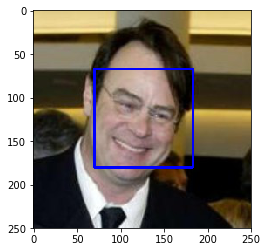

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

What percentage of the first 100 images in human_files have a detected human face? 
**98%**

What percentage of the first 100 images in dog_files have a detected human face? 
**17%**


In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## DONE: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

detected_human_in_human=0 
for human_file in tqdm(human_files_short):
    if face_detector(human_file):
        detected_human_in_human+=1
        
detected_human_in_dog=0 
for dog_file in tqdm(dog_files_short):
    if face_detector(dog_file):
        detected_human_in_dog+=1
        
# Since we looked at 100 images, these counters represent the required percentages ( (x/100) * 100 = x)
print("What percentage of the first 100 images in human_files have a detected human face? ")
print("{}%".format(detected_human_in_human))
print("What percentage of the first 100 images in dog_files have a detected human face? ")
print("{}%".format(detected_human_in_dog))

100%|██████████| 100/100 [01:21<00:00,  3.88it/s]

What percentage of the first 100 images in human_files have a detected human face? 
98%
What percentage of the first 100 images in dog_files have a detected human face? 
17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda: 
    VGG16 = VGG16.cuda()
    
print(VGG16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:15<00:00, 35557077.32it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## DONE: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Load image from img_path
    img= Image.open(img_path)
    
    # VGG-16 Takes 224x224 images as input.
    # Also according to PyTorch documentation:
    # All pre-trained models expect input images normalized in the same way, 
    # i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. 
    # The images have to be loaded in to a range of [0, 1] and then normalized using 
    # mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]
    transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                    transforms.ToTensor(), 
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])
    img = transform(img)
    
    # Set model to eval mode to make predictions.
    VGG16.eval()
    
    # Move image tensor to GPU if CUDA is available
    if torch.cuda.is_available():
        img = img.cuda()
    
    # Make prediction for image. torch.unsqueeze used to add the 'batch size' dimension of 1 for our single image.
    probs = VGG16(img.unsqueeze(0))
    
    # Convert output probabilities to predicted class
    _, pred = torch.max(probs, 1)
    
    return pred.item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## DONE: Complete the function.
    pred_class_index = VGG16_predict(img_path)
    return ( (pred_class_index >= 151) & (pred_class_index <= 268) ) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

What percentage of the images in human_files_short have a detected dog? 
**1 %**

What percentage of the images in dog_files_short have a detected dog?
**99 %**


In [9]:
## DONE: Test the performance of the dog_detector function
## on the images in human_files_short and dog_files_short.

detected_dog_in_human = 0 
for human_img in tqdm(human_files_short):
    if dog_detector(human_img):
        detected_dog_in_human+=1

detected_dog_in_dog = 0
for dog_img in tqdm(dog_files_short):
    if dog_detector(dog_img):
        detected_dog_in_dog+=1
        
# Since we looked at 100 images, these counters represent the required percentages ( (x/100) * 100 = x)      
print("What percentage of the images in human_files_short have a detected dog? ")
print("{} %".format(detected_dog_in_human))
print("What percentage of the images in dog_files_short have a detected dog?")
print("{} %".format(detected_dog_in_dog))

100%|██████████| 100/100 [01:34<00:00,  1.08it/s]

What percentage of the images in human_files_short have a detected dog? 
1 %
What percentage of the images in dog_files_short have a detected dog?
99 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets
from torch.utils.data import DataLoader

### DONE: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# The batch size for training/validation/testing
batch_size = 20

# Transformations
train_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(0.25),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])])

val_test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])])


# Load train/validation/test datasets applying the specified transformations
train_data = datasets.ImageFolder("/data/dog_images/train", transform=train_transform)
valid_data = datasets.ImageFolder("/data/dog_images/valid", transform=val_test_transform)
test_data  = datasets.ImageFolder("/data/dog_images/test",  transform=val_test_transform)


# Data loaders for each set. 
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_data,  batch_size=batch_size, shuffle=False)


# Define loaders_scratch dictionary, required for following functions
loaders_scratch = {"train": train_loader, 
                   "valid": valid_loader, 
                   "test" : test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- I resized the images to 224 X 224 by randomly cropping them. This size was selected to maintain the same frame of reference with VGG model which will be used later and expects input images to be of this size. 

- I augmented the dataset by randomly rotating images (within 10 degrees) and randomly flipping them horizontaly (with a probability of 0.25) in order to make it more rotation invariant. i.e. help my models detect features regardless of their rotation (dog love to lie down, run, jump etc :))

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### DONE: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        
        # Pooling layers
        self.pool  = nn.MaxPool2d(2, 2)
        
        # Batch normalization layers
        self.bnorm = nn.BatchNorm1d(4096)
        
        # Fully connected layers
        self.fc1 = nn.Linear(7*7*128, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 133)
        
        # Dropout
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        ## Define forward behavior
        
        # Pass through the convolutional-pooling pairs
        x = self.dropout(self.pool(F.relu(self.conv1(x))))
        x = self.dropout(self.pool(F.relu(self.conv2(x))))
        x = self.dropout(self.pool(F.relu(self.conv3(x))))
        x = self.dropout(self.pool(F.relu(self.conv4(x))))
        x = self.dropout(self.pool(F.relu(self.conv5(x))))
        
        # Flatten image to pass to the fully connected part of the network
        x = x.view(-1, 7*7*128)
        
        # Pass through the fully connected layers
        x = self.dropout(F.relu(self.bnorm((self.fc1(x)))))
        x = self.dropout(F.relu(self.bnorm((self.fc2(x)))))
        x = self.fc3(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
print(model_scratch)

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bnorm): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=6272, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=133, bias=True)
  (dropout): Dropout(p=0.2)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

My network architecture consists of two parts: the convolutional part (**feature extractor**) followed by the fully connected part (**classifier**). After following a trial and error process of defining a network architecture (training/validating/testing each candidate model for a few epochs) and borrowing some ideas from the VGG16 architecture, I ended up with the following design decisions:

For the feature extractor I used **5 Convolutional layer - Max Pooling layer pairs**. Each convolutional layer **increases the depth**  of the input images by applying **3x3 filters** which generate new **activation maps** and each subsequent max pooling layer **decreases the spatial (width/height) dimensions** of the images. Eventually, 224x224x3 images fed into the feature extractor come out as 7*7*128.

These feature extractor outputs are then **flattened** from (batch_size x 7 x 7 x 128) to (batch_size x 6272) and fed into the classifier, which passes them through its **3 fully-connected layers** and generates the scores for the **133 classes**.

The **loss function** (criterion) was set to **Cross Entropy loss** for this multi-class classification task.

Initially, the architecture described above was trained using Adam optimiser with various learning rates and it didn't work (training and validation loss would both plateau at ~4.8 and not decrease any further). I decided to try a different optimiser.

**Optimiser** was set to **SGD** with a **learning rate of 0.01**; this time training looked healthier but soon it was evident that the model was overfitting the training data, as the training loss was continuously decreasing while validation loss had plateaued. 

To fight overfitting, I used **dropout**. Initially I applied dropout to the fully connected layers and later on I exteded it to the max pooling layers.
(this paper was really useful: [https://arxiv.org/ftp/arxiv/papers/1512/1512.00242.pdf ]) 

Lastly, I applied **batch normalisation** between the fully-connected layers of the classifier, to speed up training and reduce sensitivity to weight initialisation.
(this paper was really usefull: [https://arxiv.org/pdf/1502.03167.pdf ]) 


Finally, this configuration was able to achieve **test accuracy of 21%**.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optim

### DONE: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### DONE: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [14]:
from time import time

# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    # Time the entire training/validation process
    train_start_time = time()
    
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        
        # Time each epoch in order to be able to monitor training
        start_time = time()
        
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            # Zero out gradients from previous iterations
            optimizer.zero_grad()
            # Forward pass
            output = model(data)
            # Loss
            loss = criterion(output, target)
            # Backward pass
            loss.backward()
            # Optimizer step (Update weights)
            optimizer.step()
            
            # update average train loss 
            train_loss = train_loss + ( (1 / (batch_idx + 1) ) * (loss.data - train_loss) )
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
                
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            # Forward pass
            output = model(data)
            # Loss
            loss = criterion(output, target)
            
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))
        
        ## DONE: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model at {}'.format(valid_loss_min, valid_loss, save_path))
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
            
        print("Epoch time: {:.3f} seconds.".format(time()-start_time))
            
    print("Overall training/validation time: {:.3f} seconds.".format(time()-train_start_time))

    return model

train the model
epochs = 200
try:
    model_scratch = train(epochs, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')
except KeyboardInterrupt:
    print("Training interrupted!")

# load the model that got the best validation accuracy
print('Loading model from {}'.format('model_scratch.pt'))
if use_cuda:
    model_scratch.load_state_dict(torch.load('model_scratch.pt'))
else:
    model_scratch.load_state_dict(torch.load('model_scratch.pt', map_location=lambda storage, loc: storage ))

Loading model from model_scratch.pt


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.480506


Test Accuracy: 21% (176/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [16]:
## DONE: Specify data loaders

# I will use the data loaders that I created for Step 3.
loaders_transfer = {"train": train_loader, 
                    "valid": valid_loader, 
                    "test" : test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [17]:
import torchvision.models as models
import torch.nn as nn

## DONE: Specify model architecture 

# I will use the pre-trained VGG16 model. I will reload the model so I can modify it without breaking dog_detector.
model_transfer = models.vgg16(pretrained=True)

# Freeze training for all layers in the feature extractor part of VGG16 
for p in model_transfer.features.parameters():
    p.requires_grad = False

# Modify the output of last fully-connected layer of the VGG16 classifier to match our problem needs
print("Original VGG16 classifier\n{}".format(model_transfer.classifier))
model_transfer.classifier[6] = nn.Linear(4096, 133)
print("Modified VGG16 classifier\n{}".format(model_transfer.classifier))

if use_cuda:
    model_transfer = model_transfer.cuda()

Original VGG16 classifier
Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)
Modified VGG16 classifier
Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=133, bias=True)
)


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


I used VGG16 as a starting point. VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition” ([https://arxiv.org/pdf/1409.1556.pdf ]). The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.

VGG16 consists of 2 parts: a convolutional feature detector followed by a fully connected calassifier.
I decided to:
- Use the feature detector as is, in order to exploit its demonstrated power for my own problem.
- Modify the last fully-connected layer of the classifier to make it output 133 scores (my problem's classes).

With this configuration my model achieved a test accuracy of 85% therefore I did not try any further modifications.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [18]:
criterion_transfer = nn.CrossEntropyLoss()

optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [20]:
# train the model
epochs = 100
try:
    model_transfer = train(epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
except KeyboardInterrupt:
    print("Training interrupted!")
    
# load the model that got the best validation accuracy (uncomment the line below)
print('Loading model from {}'.format('model_transfer.pt'))
if use_cuda:
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
else:
    model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=lambda storage, loc: storage ))

Loading model from model_transfer.pt


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [21]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.550425


Test Accuracy: 85% (713/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [22]:
### DONE: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    
    # Load image from img_path.
    img= Image.open(img_path)
    # Apply the necessary transformations.
    img = val_test_transform(img)
    # Set model to eval mode to make predictions
    model_transfer.eval()
    # Move img tensor to GPU if available.
    if use_cuda:
        img = img.cuda()
    # Calculate model class scores. - torch.unsqueeze used to add the 'batch size' dimension of 1 for our single image.
    scores = model_transfer(img.unsqueeze(0))
    # Convert class scores to predicted class
    _, pred = torch.max(scores, 1)
    # Predicted class index
    class_index = pred.item()
    
    return class_names[pred.item()]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [23]:
### DONE: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    # Display image
    # load color (BGR) image
    img = cv2.imread(img_path)
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # display the image, along with bounding box
    plt.imshow(cv_rgb)
    plt.show()
    
    # Look for dogs
    if dog_detector(img_path):
        print("I see a dog! Looks like a... {}".format(predict_breed_transfer(img_path)))
    elif face_detector(img_path):
        print("I see a person! Looks like a... {}".format(predict_breed_transfer(img_path)))
    else:
        print("I can't see anything!")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

- **Multiple detection**: I could modify the algorithm to detect multiple people and/or dogs in a given input image and provide a prediction for all their resembling/actual breeds.

- **User input handling**: I have made over-simplified assumpions about user input. For example if a user inputs an image 1024X1024 with a dog somewhere in it and I randomly crop it to 224X224 chances are I will miss the dog! Therefore I would refactor the user input handling part to make sure that what I keep from the input image is what my model needs to do its job.

- **Age**: Puppies look a lot different than older dogs of the same breed. This could pose a serious challenge for my model and addressing it would potentially require new data (i.e. include photos of different ages for each breed)altering the model architecture or even the overall approach to solving the problem (for example we could apply hierarchical classification, identifying age group before breed).

- **Mixed-Breeds**: My model assumes that each dog will fall into a breed class with very high certainty. This is not going to be the case for mixed breed dogs. I could accomodate for that by allowing my model to make mixed predictions, when the output scores have a certain level of confusion (i.e. if an image ranks as 87% a boxer, predict boxer, otherwise if it's like 59% boxer - 37% pitbull, predict both!) or even output the top 3 breeds with their respective probability by default.

- **Data collection**: Always abiding by data protection laws etc. I could collect user input images to continuously train and enhance my model. Particularly for dog images, I could introduce a feedback mechanism through which the user could accept or reject my model's prediction (providing what they think the breed is in the later case)and focus on my model's mistakes.



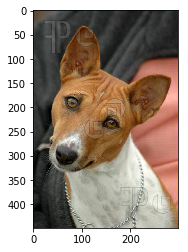

I see a dog! Looks like a... Basenji


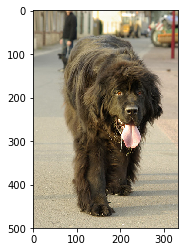

I see a dog! Looks like a... Newfoundland


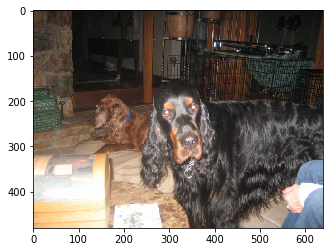

I see a dog! Looks like a... Gordon setter


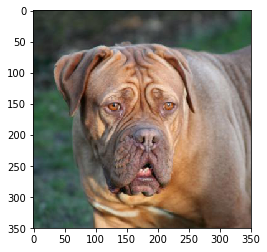

I see a dog! Looks like a... Dogue de bordeaux


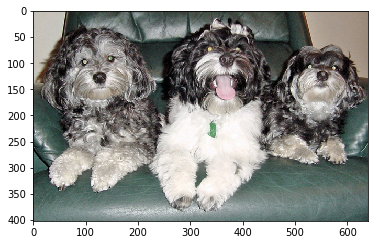

I see a dog! Looks like a... Lowchen


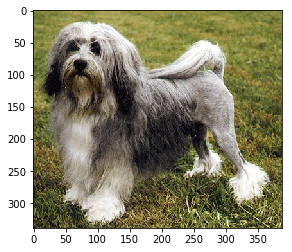

I see a dog! Looks like a... Lowchen


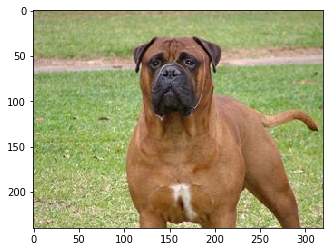

I see a dog! Looks like a... Boxer


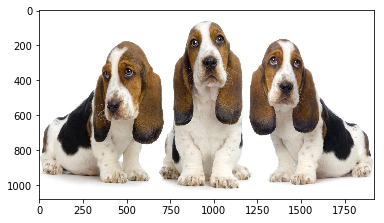

I see a dog! Looks like a... Basset hound


In [26]:
## DONE: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

from random import randrange

# Trying the algorithm on some random dog files from the dataset.
dfiles = [dog_files[randrange(len(dog_files))] for i in range(8)]
for file in dfiles:
    run_app(file)

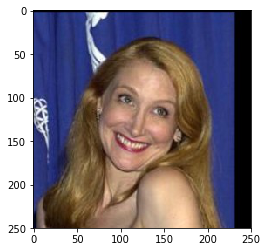

I see a person! Looks like a... English springer spaniel


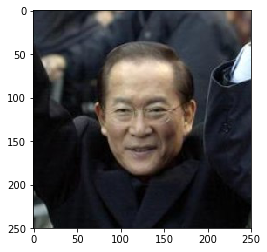

I see a person! Looks like a... Dachshund


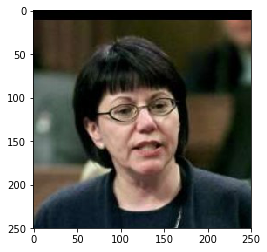

I see a person! Looks like a... Silky terrier


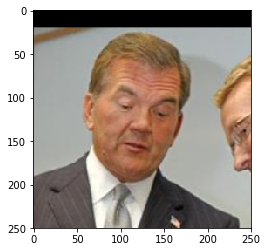

I see a person! Looks like a... English springer spaniel


In [25]:
# Trying the algorithm on some random human files from the dataset.
hfiles = [human_files[randrange(len(human_files))] for i in range(4)]
for file in hfiles:
    run_app(file)

my_images/milo.jpg


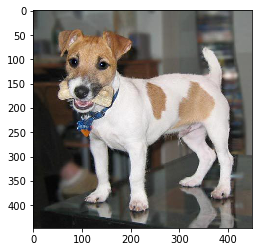

I see a dog! Looks like a... Parson russell terrier

my_images/lassie.jpg


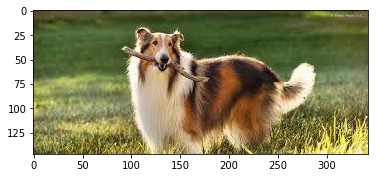

I see a dog! Looks like a... Collie

my_images/rex.jpg


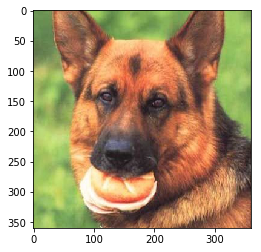

I see a dog! Looks like a... German shepherd dog

my_images/gravelly-hill.jpg


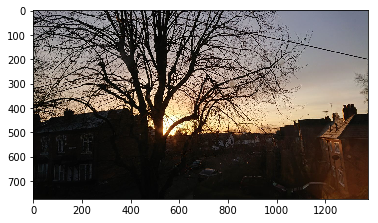

I can't see anything!

my_images/beethoven.jpg


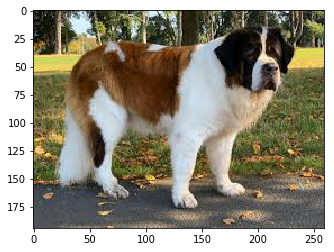

I see a dog! Looks like a... Saint bernard

my_images/fang.jpg


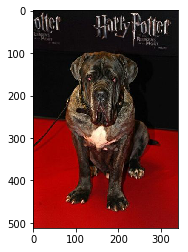

I see a dog! Looks like a... Neapolitan mastiff

my_images/pongo.jpg


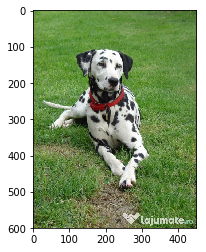

I see a dog! Looks like a... Dalmatian

my_images/IMG-20180330-WA0011.jpg


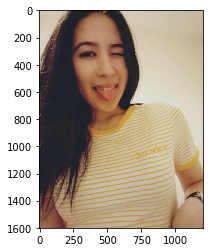

I see a person! Looks like a... Maltese

my_images/marios.jpg


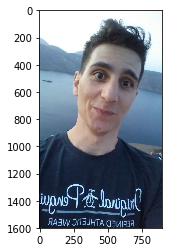

I see a person! Looks like a... Lowchen

my_images/IMG-20180406-WA0008.jpeg


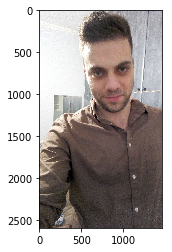

I see a person! Looks like a... Lowchen



In [47]:
# Test on my images

# load filenames
my_files = np.array(glob("my_images/*"))

for file in my_files:
    print(file)
    run_app(file)
    print()